# Time Series Forecasting with Prophet

Reference: https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.plot import plot_plotly

In [3]:
import iolib

In [4]:
goog = iolib.read_nasdaq("data/nasdaq/GOOG.csv")

In [6]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
 2   Volume      2517 non-null   int64         
 3   Open        2517 non-null   float64       
 4   High        2517 non-null   float64       
 5   Low         2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


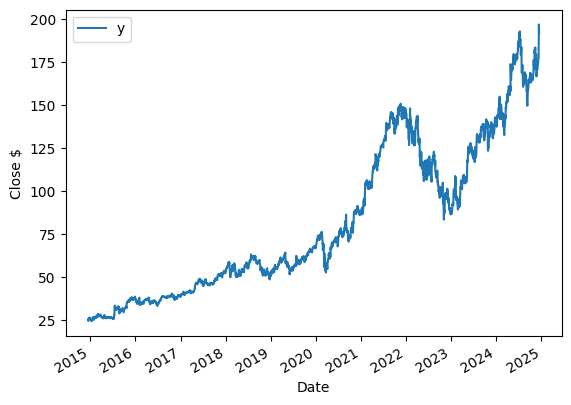

In [14]:
# Prophet will need a 2-column dataframe, in this case, the date, and the closing price.
# The column headings must be "ds" and "y"
gclose = goog[["Date", "Close/Last"]].copy()
gclose.rename(columns={"Date": "ds", "Close/Last": "y"}, inplace=True)
# Plot the data.
ax = gclose.set_index("ds").plot()
ax.set_ylabel("Close $")
ax.set_xlabel("Date")
plt.show()

In [11]:
# create the model, with an uncertainty interval of 90%
my_model = Prophet(interval_width=0.9)

In [15]:
# fit the model with the data.
my_model.fit(gclose)

02:55:49 - cmdstanpy - INFO - Chain [1] start processing
02:55:51 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
future_dates = my_model.make_future_dataframe(periods=36, freq="MS")
future_dates.head()

,ds
0,2014-12-15
1,2014-12-16
2,2014-12-17
3,2014-12-18
4,2014-12-19


In [20]:
forecast = my_model.predict(future_dates)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-12-15,24.167520,15.831723,32.214807
1,2014-12-16,24.242341,16.064964,32.619570
2,2014-12-17,24.292142,16.274781,33.231785
3,2014-12-18,24.303136,15.819770,32.472735
4,2014-12-19,24.386965,16.036423,32.953631


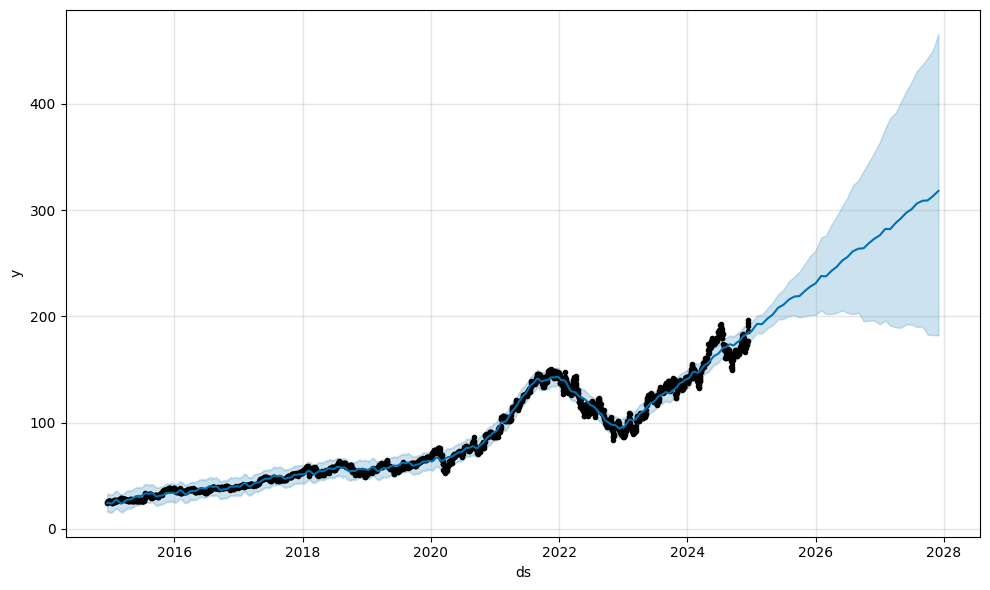

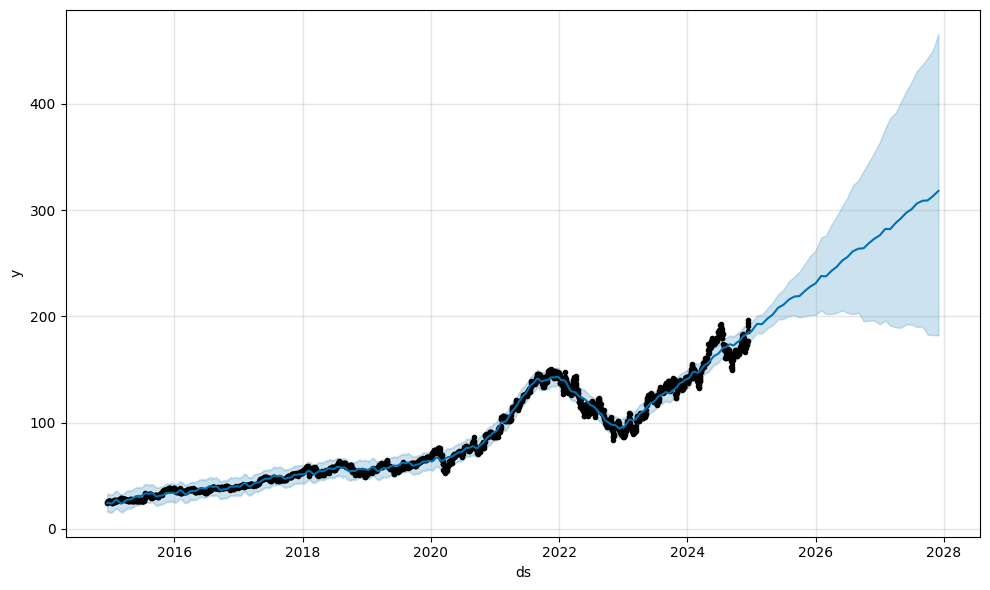

In [21]:
my_model.plot(forecast, uncertainty=True)

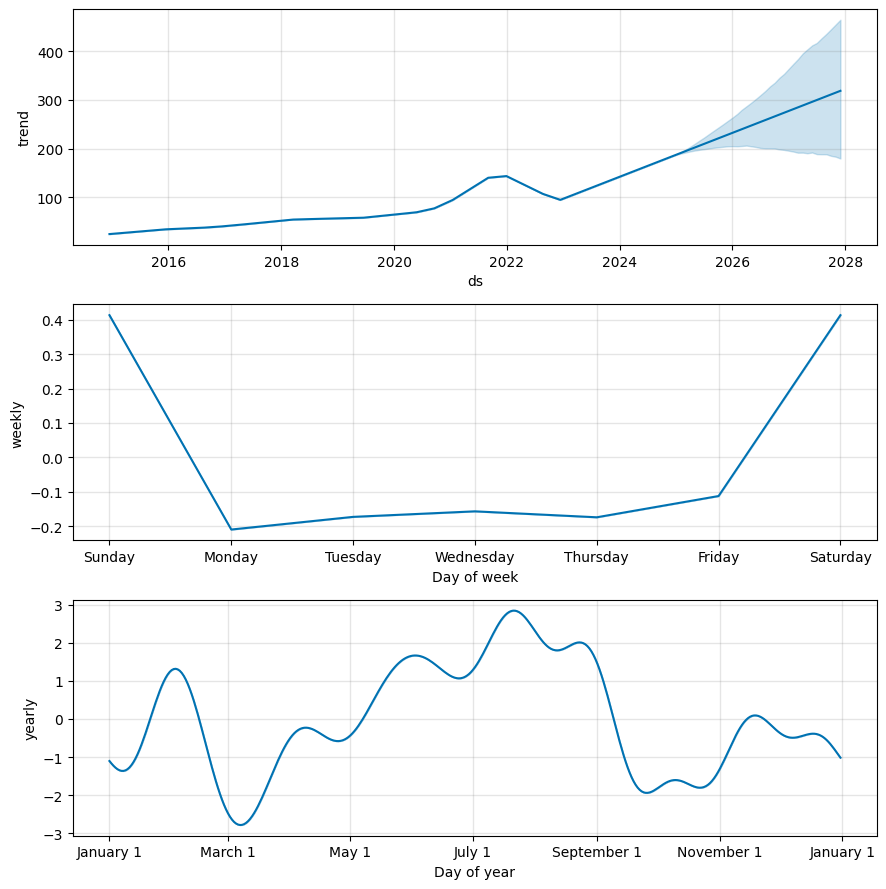

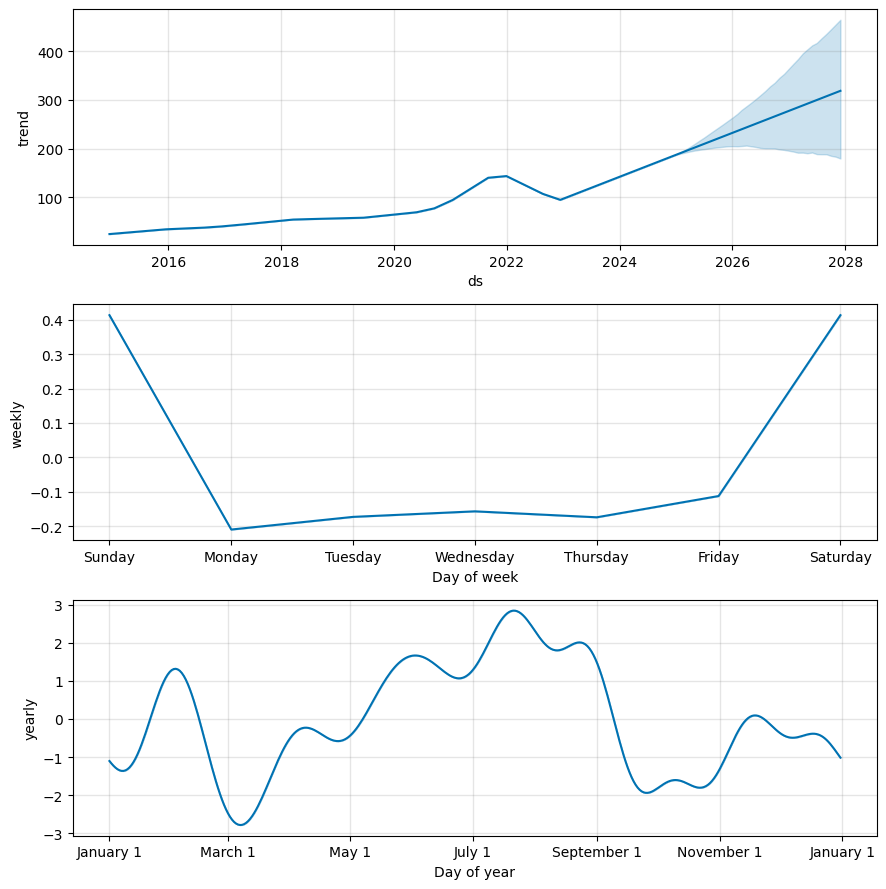

In [22]:
my_model.plot_components(forecast)